<h1><center> $$Un tableau de bord sur le Covid$$ </center></h1>



Contexte du projet

Maintenant que vous êtes réputés pour vos dashboards, La haute autorité de santé vous commande un tableau de bord en ligne pour pouvoir suivre les indicateurs sur le Covid-19.


Modalités pédagogiques

Le projet est a réaliser en équipe de 2 ou 3 apprenants. Vous devez coder un dashboard à partir des datasets proposé sur le Covid-19. Vous aurez sans doute à retraiter ces données pour les rendres exploitables. En Front, affichez dans votre Dashboard 3 à 4 indicateurs qui vous parraissent intéressants.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import numpy

# PREPARATION DES DONNEES

## 1er fichier données hospitalières relatives au covid

In [2]:
#ouverture du fichier donnees-hospitalieres-covid19-2021-01-21-19h03  
#source https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/
hopital= pd.read_csv('./donneeshospitalieres.csv', sep = ";", na_filter=False)
hopital

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6
...,...,...,...,...,...,...,...
93925,974,1,2021-01-21,26,6,371,26
93926,974,2,2021-01-21,20,0,381,28
93927,976,0,2021-01-21,13,4,568,44
93928,976,1,2021-01-21,4,3,275,27


Nous récupérons quotidiennement par département grâce au dataframe les informations suivantes: 

    le nombre de patients hospitalisés, 
    
    le nombre de patients actuellement en réanimation , 
    
    le nombre de patients retourné à domicile
    
    le nombre de décès.
    
Chaque département , affiche les données par sexe(=>3 lignes par département).
    1=> homme
    2=> femme
    0=> total


Notre jeu de données comporte les informations suivantes :    
    
    Les données hospitalières relatives à l'épidémie du COVID-19:

            dep = par département 

            sexe =sexe du patient 

            hosp :nombre de patients hospitalisés 

            rea : nombre de personnes actuellement en réanimation ou soins intensifs

            rad : nombre cumulé de personnes retournées à domicile

            dc : nombre cumulé de personnes décédées.

In [3]:
#exemple pour renommer les colonnes
 
#data.rename(columns = {'hosp': 'nombre de patients hospitalisés', 'dc': 'nombre cumulé de personnes décédées'})

In [4]:
print(list(hopital), end="\n\n")
for var in list(hopital):
    print("{} contains {} labels".format(var,len(hopital[var].unique())), end="\n\n")

['dep', 'sexe', 'jour', 'hosp', 'rea', 'rad', 'dc']

dep contains 101 labels

sexe contains 3 labels

jour contains 310 labels

hosp contains 1502 labels

rea contains 426 labels

rad contains 5393 labels

dc contains 1842 labels



## 2eme fichier données géographique pour compléter nos informations, et population en FRANCE

### retraitement des chiffres dans la colonne  département (modifié le 1 en 01)

In [5]:
coordonnees= pd.read_csv('./dep_coor.csv', sep = ",", na_filter=False)
coordonnees

,dep_code,dep_name,region_code,region,Longitude en degre,Latitude en degre,Pop_2018
0,1,Ain,84,Auvergne-Rhône-Alpes,5.340247,46.080770,663720
1,2,Aisne,32,Hauts-de-France,3.530170,49.547387,545353
2,3,Allier,84,Auvergne-Rhône-Alpes,3.179084,46.352009,346156
3,4,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur,6.149504,44.077202,168613
4,5,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur,6.115795,44.578924,145309
...,...,...,...,...,...,...,...
97,972,Martinique,2,Martinique,13.469529,-51.579534,373762
98,973,Guyane,3,Guyane,4.673780,-52.996532,278472
99,974,La Réunion,4,La Réunion,-10.299767,37.345128,865507
100,975,Saint-Pierre-et-Miquelon,COM,Collectivités d'Outre-Mer,46.710700,1.718190,6224


In [6]:
coordonnees['dep_code'] = coordonnees['dep_code'].apply(str)

In [7]:
coordonnees['dep_code'] = coordonnees['dep_code'] .replace(['1','2','3', '4', '5', '6', '7', '8', '9'],['01','02','03', '04', '05', '06', '07', '08', '09'])

In [8]:
coordonnees

,dep_code,dep_name,region_code,region,Longitude en degre,Latitude en degre,Pop_2018
0,01,Ain,84,Auvergne-Rhône-Alpes,5.340247,46.080770,663720
1,02,Aisne,32,Hauts-de-France,3.530170,49.547387,545353
2,03,Allier,84,Auvergne-Rhône-Alpes,3.179084,46.352009,346156
3,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur,6.149504,44.077202,168613
4,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur,6.115795,44.578924,145309
...,...,...,...,...,...,...,...
97,972,Martinique,2,Martinique,13.469529,-51.579534,373762
98,973,Guyane,3,Guyane,4.673780,-52.996532,278472
99,974,La Réunion,4,La Réunion,-10.299767,37.345128,865507
100,975,Saint-Pierre-et-Miquelon,COM,Collectivités d'Outre-Mer,46.710700,1.718190,6224


Pour augmenter la qualité du dashboard, nous décidons de concatener deux jeux de données, nous décidons de rajouter des informations complémentaires


## ON JOINT LES 2 TABLEAUX

In [9]:
data = pd.merge(left=coordonnees, right=hopital, left_on='dep_code', right_on='dep')
data

,dep_code,dep_name,region_code,region,Longitude en degre,Latitude en degre,Pop_2018,dep,sexe,jour,hosp,rea,rad,dc
0,01,Ain,84,Auvergne-Rhône-Alpes,5.340247,46.080770,663720,01,0,2020-03-18,2,0,1,0
1,01,Ain,84,Auvergne-Rhône-Alpes,5.340247,46.080770,663720,01,1,2020-03-18,1,0,1,0
2,01,Ain,84,Auvergne-Rhône-Alpes,5.340247,46.080770,663720,01,2,2020-03-18,1,0,0,0
3,01,Ain,84,Auvergne-Rhône-Alpes,5.340247,46.080770,663720,01,0,2020-03-19,2,0,1,0
4,01,Ain,84,Auvergne-Rhône-Alpes,5.340247,46.080770,663720,01,1,2020-03-19,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93925,976,Mayotte,6,Mayotte,45.146959,-12.816065,262895,976,1,2021-01-20,4,2,274,27
93926,976,Mayotte,6,Mayotte,45.146959,-12.816065,262895,976,2,2021-01-20,7,1,287,17
93927,976,Mayotte,6,Mayotte,45.146959,-12.816065,262895,976,0,2021-01-21,13,4,568,44
93928,976,Mayotte,6,Mayotte,45.146959,-12.816065,262895,976,1,2021-01-21,4,3,275,27


Suite à la compilation des deux jeux de donneées, nous avons les données relatives au covid, par département, région et coordonnées géogaphiques.


In [10]:
list(data)

['dep_code',
 'dep_name',
 'region_code',
 'region',
 'Longitude en degre',
 'Latitude en degre',
 'Pop_2018',
 'dep',
 'sexe',
 'jour',
 'hosp',
 'rea',
 'rad',
 'dc']

In [30]:
import csv

with open('donnees.csv', 'w') as f: 
      
    # using csv.writer method from CSV package 
    write = csv.writer(f) 
      
    write.writerow(data)
    for elt in data:
        write.writerow(data[elt])

   

In [32]:
donnees= pd.read_csv('./donnees.csv', sep = ",", na_filter=False)
donnees

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 11: invalid continuation byte

## ANALYSE DES DONNEES MANQUANTES

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93930 entries, 0 to 93929
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dep_code            93930 non-null  object 
 1   dep_name            93930 non-null  object 
 2   region_code         93930 non-null  object 
 3   region              93930 non-null  object 
 4   Longitude en degre  93930 non-null  float64
 5   Latitude en degre   93930 non-null  float64
 6   Pop_2018            93930 non-null  int64  
 7   dep                 93930 non-null  object 
 8   sexe                93930 non-null  int64  
 9   jour                93930 non-null  object 
 10  hosp                93930 non-null  int64  
 11  rea                 93930 non-null  int64  
 12  rad                 93930 non-null  int64  
 13  dc                  93930 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 10.7+ MB
None


In [12]:
#vue d'ensemble des valeurs manquantes
def num_missing(X):
    return sum(X.isnull())

# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(data.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne

# Puis application pour chaque ligne:
print("\nValeurs manquantes par ligne:")
print(data.apply(num_missing, axis=1).head()) #axis=1 définit que la fonction sera bien appliquée sur chaque ligne


Valeurs manquantes par colonne:
dep_code              0
dep_name              0
region_code           0
region                0
Longitude en degre    0
Latitude en degre     0
Pop_2018              0
dep                   0
sexe                  0
jour                  0
hosp                  0
rea                   0
rad                   0
dc                    0
dtype: int64

Valeurs manquantes par ligne:
0    0
1    0
2    0
3    0
4    0
dtype: int64


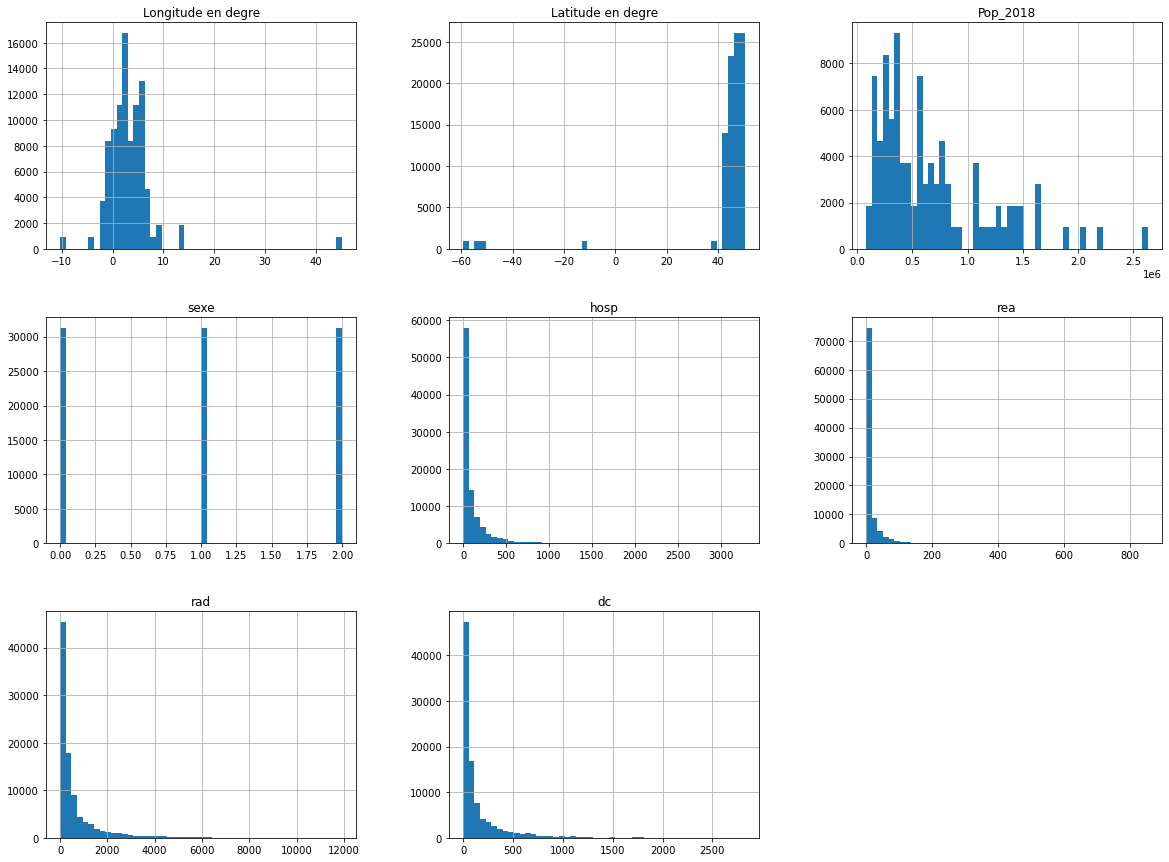

In [13]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,Longitude en degre,Latitude en degre,Pop_2018,sexe,hosp,rea,rad,dc
Longitude en degre,1.000000,-0.478614,-0.100304,0.000000,0.004372,0.005231,0.028078,0.025928
Latitude en degre,-0.478614,1.000000,0.156601,0.000000,0.114275,0.076992,0.090317,0.137182
Pop_2018,-0.100304,0.156601,1.000000,0.000000,0.577641,0.509155,0.625905,0.610150
sexe,0.000000,0.000000,0.000000,1.000000,-0.179677,-0.191314,-0.188020,-0.214696
hosp,0.004372,0.114275,0.577641,-0.179677,1.000000,0.894173,0.653999,0.683460
rea,0.005231,0.076992,0.509155,-0.191314,0.894173,1.000000,0.505777,0.531663
rad,0.028078,0.090317,0.625905,-0.188020,0.653999,0.505777,1.000000,0.966894
dc,0.025928,0.137182,0.610150,-0.214696,0.683460,0.531663,0.966894,1.000000


<AxesSubplot:>

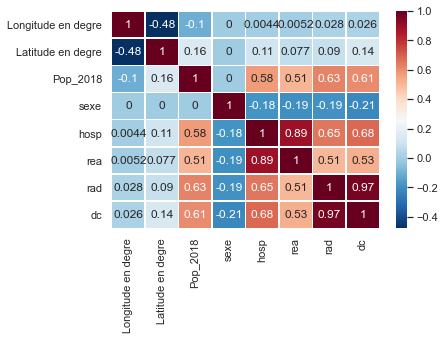

In [15]:
import seaborn as sb; sb.set(style="white", color_codes=True)
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

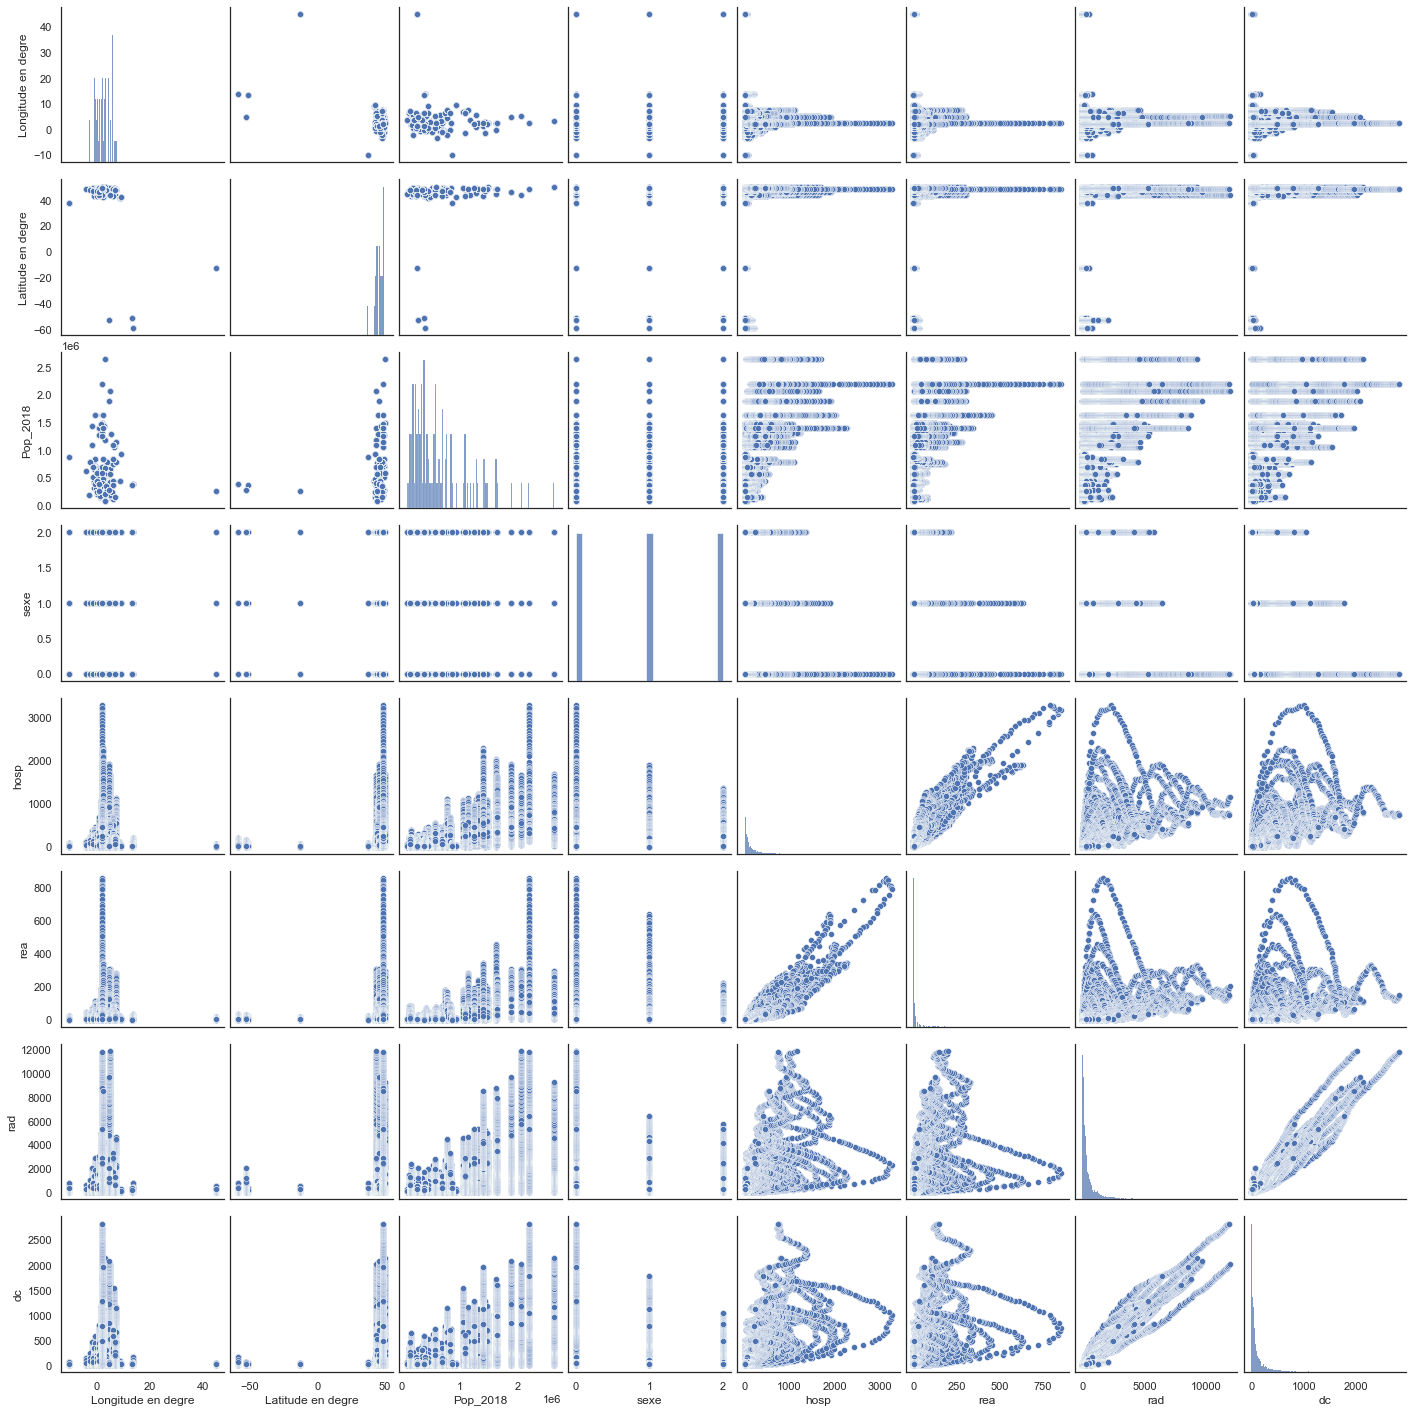

In [16]:
sb.pairplot(data)

In [17]:
data.groupby(['sexe']).describe()

Longitude en degre                                                     \
                  count      mean       std        min       25%       50%   
sexe                                                                         
0               31310.0  3.317679  5.332894 -10.299767  0.986241  2.527126   
1               31310.0  3.317679  5.332894 -10.299767  0.986241  2.527126   
2               31310.0  3.317679  5.332894 -10.299767  0.986241  2.527126   

                          Latitude en degre             ...     rad           \
           75%        max             count       mean  ...     75%      max   
sexe                                                    ...                    
0     5.161704  45.146959           31310.0  42.892519  ...  1009.0  11919.0   
1     5.161704  45.146959           31310.0  42.892519  ...   502.0   6417.0   
2     5.161704  45.146959           31310.0  42.892519  ...   504.0   5750.0   

           dc                                                          
        count        mean         std  min   25%   50%    75%     max  
sexe                                                                   
0     31310.0  229.043500  353.007392  0.0  33.0  91.0  249.0  2826.0  
1     31310.0  134.296103  210.324716  0.0  19.0  52.0  145.0  1779.0  
2     31310.0   93.734111  141.810316  0.0  13.0  39.0  104.0  1041.0  

[3 rows x 56 columns]

In [18]:

data.sexe.value_counts()

pd.crosstab(data.sexe, "freq")

col_0,freq
sexe,
0,31310
1,31310
2,31310


In [19]:
# Afficher la table croisée du nombre des fumeurs et non fumeurs selon leur sex avec le nombre total de chaque ligne/colonne dans le jeux de données
pd.crosstab(data.sexe, data.dc)

dc,0,1,2,3,4,5,6,7,8,9,...,2765,2770,2782,2787,2795,2796,2801,2813,2821,2826
sexe,,,,,,,,,,,,,,,,,,,,,
0,539,498,293,197,143,187,175,153,144,256,...,1,1,1,1,1,1,1,1,1,1
1,675,516,416,288,191,242,519,545,615,499,...,0,0,0,0,0,0,0,0,0,0
2,1429,544,304,428,500,557,438,640,303,796,...,0,0,0,0,0,0,0,0,0,0


In [20]:

# Affiche la moyenne, l'écart-type, médiane, min et max de la variable décés groupés par sexe

data.groupby("sexe")["dc"].agg([numpy.mean, numpy.std, numpy.median, numpy.min, numpy.max])

,mean,std,median,amin,amax
sexe,,,,,
0,229.043500,353.007392,91,0,2826
1,134.296103,210.324716,52,0,1779
2,93.734111,141.810316,39,0,1041


In [21]:
for i in range(3):
    print(i, (data["hosp"][data['sexe']== i]).sum())

0 5092585
1 2625032
2 2419463


In [22]:
data.groupby('dep').dc.mean()

dep
01      99.866667
02     198.026882
03      60.030108
04      19.002151
05      27.131183
          ...    
971     43.898925
972     14.608602
973     25.677419
974     11.666667
976     16.967742
Name: dc, Length: 101, dtype: float64

In [23]:
data.groupby('dep').dc.describe()

,count,mean,std,min,25%,50%,75%,max
dep,,,,,,,,
01,930.0,99.866667,85.933909,0.0,44.0,67.0,113.75,423.0
02,930.0,198.026882,111.569015,5.0,112.0,173.5,274.00,615.0
03,930.0,60.030108,76.141653,0.0,19.0,25.5,59.00,384.0
04,930.0,19.002151,24.635994,0.0,4.0,9.0,17.00,131.0
05,930.0,27.131183,34.642880,0.0,8.0,11.0,26.00,164.0
...,...,...,...,...,...,...,...,...
971,930.0,43.898925,49.267995,0.0,8.0,17.0,66.00,169.0
972,930.0,14.608602,10.922544,0.0,4.0,14.0,18.00,44.0
973,930.0,25.677419,23.230979,0.0,1.0,23.0,43.00,72.0
